In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df1 = pd.read_excel("Concrete.xlsx")
df1.columns =['Cement', 'Slag', 'Ash', 'water', 'Superplasticizer', 'Coarse', 'Aggregate', 'Age', 'strength']
df1.head()

,Cement,Slag,Ash,water,Superplasticizer,Coarse,Aggregate,Age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Aggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


In [5]:
corr_matrix = df1.corr()
corr_matrix 

,Cement,Slag,Ash,water,Superplasticizer,Coarse,Aggregate,Age,strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


In [6]:
corr_matrix["strength"].sort_values(ascending=False)

strength            1.000000
Cement              0.497833
Superplasticizer    0.366102
Age                 0.328877
Slag                0.134824
Ash                -0.105753
Coarse             -0.164928
Aggregate          -0.167249
water              -0.289613
Name: strength, dtype: float64

In [7]:
corr_matrix["strength"].sort_values()

water              -0.289613
Aggregate          -0.167249
Coarse             -0.164928
Ash                -0.105753
Slag                0.134824
Age                 0.328877
Superplasticizer    0.366102
Cement              0.497833
strength            1.000000
Name: strength, dtype: float64

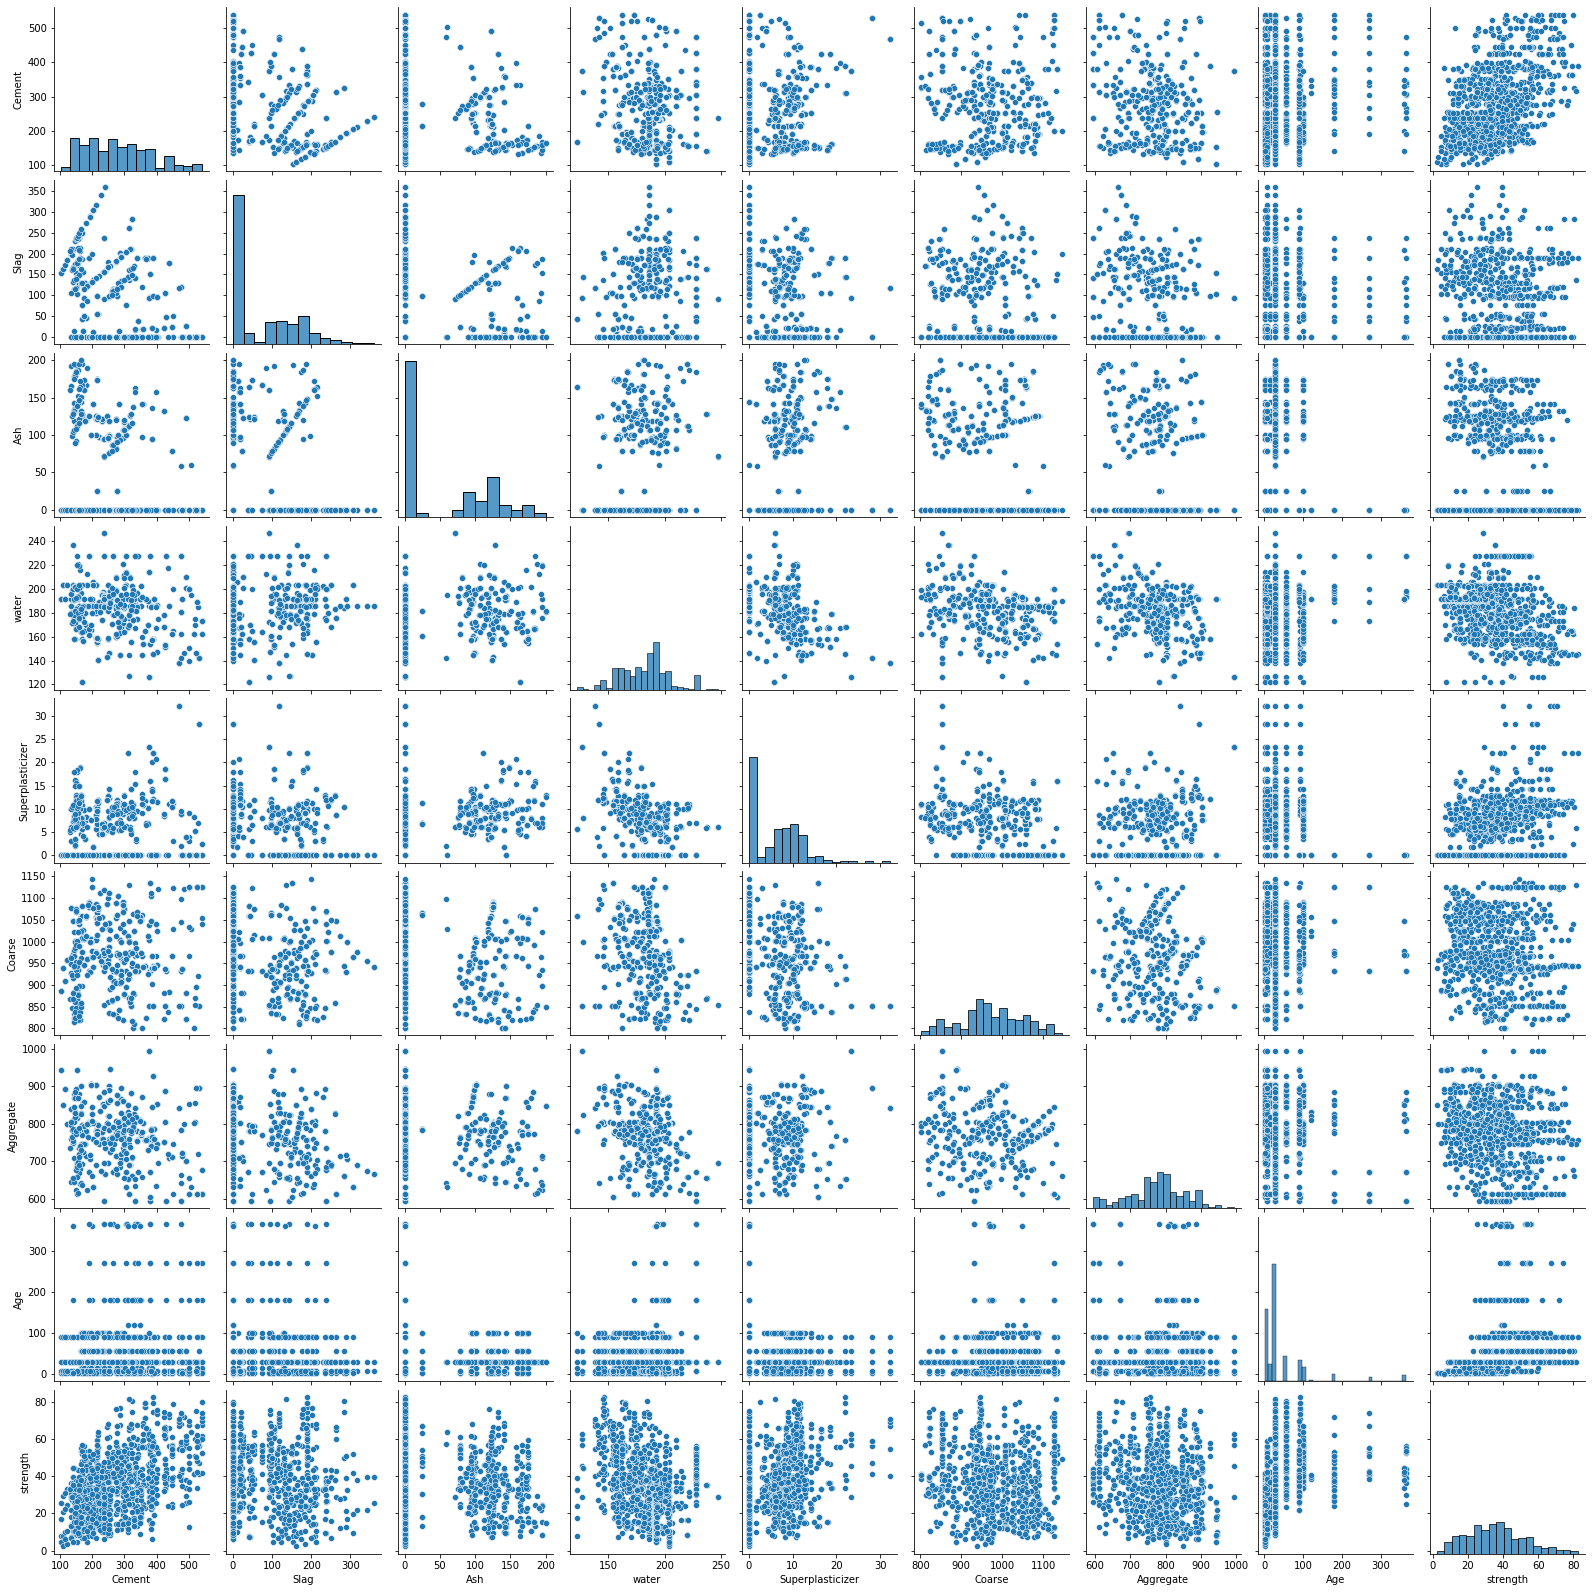

In [8]:
sns.pairplot(df1)
plt.show()

In [8]:
df1.head()

,Cement,Slag,Ash,water,Superplasticizer,Coarse,Aggregate,Age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [9]:
df1['Age'] = df1['Age'].astype(float)

In [10]:
df1.dtypes

Cement              float64
Slag                float64
Ash                 float64
water               float64
Superplasticizer    float64
Coarse              float64
Aggregate           float64
Age                 float64
strength            float64
dtype: object

# Data Pre-Processing

In [11]:
data = df1
X = data.iloc[:,:-1]         # Features - All columns but last
y = data.iloc[:,-1]          # Target - Last Column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [12]:
sc = StandardScaler()  #data scaling

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
[X_train.T]

[array([[ 0.11186439,  0.12145476,  1.83813064, ...,  0.92704568,
         -0.30656336, -1.13488345],
        [-0.83233955, -0.83233955, -0.83233955, ...,  0.29268267,
         -0.83233955, -0.8321027 ],
        [-0.8358761 , -0.8358761 , -0.8358761 , ..., -0.8358761 ,
          1.00188563,  1.39501467],
        ...,
        [ 1.22000102,  1.48858481, -0.53218846, ..., -0.53218846,
          0.70073903,  0.40913377],
        [-0.06191348, -0.06191348, -2.23505817, ..., -2.23505817,
         -0.201864  ,  1.57601671],
        [-0.61469535, -0.61469535,  0.70694492, ..., -0.61469535,
          0.86617869, -0.28030443]])]

# Gurobi Approach

In [189]:
from __future__ import division
from gurobipy import *
import numpy as np
import itertools
import time
import os
import operator as op
import matplotlib.pyplot as plt
import sys

In [190]:
# Define constants
solver = 'gurobi' # Use solver Gurobi
K_models = 10 # Size of the subset
N_models = 20 # Total number of available model runs
nlat = 36; lat = X_train
nlon = 72


In [192]:
#####################################################
## Vectorize model and observation climatology array
#####################################################
v_model = X_train[:309]  # ( N_models x time-space-dimension )
v_obs = X_test        # ( 1 x time-space-dimension )
v_wgtmat = X_test        # ( 1 x time-space-dimension 
print(v_model.shape)
print(v_obs.shape)
print(v_wgtmat.shape)

(309, 8)
(309, 8)
(309, 8)


In [195]:
## Solve the problem with Gurobi
#####################################################
#-- Create a new model
start_time1 = time.time()
m = Model("MSEtest_random")

In [196]:
#-- Set parameters
#m.setParam("OutputFlag", 0)
m.setParam("TimeLimit", 86400) # 24 hours
m.setParam("Threads", 4) # 4 cores 
m.setParam("NodefileStart", 0.5) 

Set parameter TimeLimit to value 86400
Set parameter Threads to value 4
Set parameter NodefileStart to value 0.5


In [197]:
#-- Create binary variables
x = [m.addVar(vtype=GRB.BINARY, name="x_{"+str(i)+"}") for i in range(N)]

#-- Integrate new variables
m.update()
#-- Add constraint
m.addConstr(quicksum(x) == K)


<gurobi.Constr *Awaiting Model Update*>

In [198]:
#-- Set objective (minimise mean squared error)
#print '* Set objective function.'

def get_flatten_expr():
    expr = QuadExpr()

    T = np.sum(v_wgtmat)
    w = v_wgtmat
    m = v_model
    b = v_obs

    expr.addConstant(np.sum(w*b**2)/T)

    for i in range(N):
        expr.addTerms([-2*np.sum(b*w*m[i,:])/(T*K)], [x[i]])
        expr.addTerms([np.sum(w*m[i,:]**2)/(T*K**2)], [x[i]], [x[i]])
        for k in range(i+1, N):
            expr.addTerms([2*np.sum(w*m[i,:]*m[k,:])/(T*K**2)], [x[i]], [x[k]])

    return expr

m.setObjective(get_flatten_expr(), GRB.MINIMIZE)

print ('* Start optimisation')
m.optimize()

* Start optimisation
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1 rows, 81 columns and 81 nonzeros
Model fingerprint: 0x97c9a139
Model has 3321 quadratic objective terms
Variable types: 0 continuous, 81 integer (81 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 4e+01]
  QObjective range [1e-03, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Found heuristic solution: objective 126.1818210
Presolve time: 0.01s
Presolved: 1 rows, 81 columns, 81 nonzeros
Presolved model has 3321 quadratic objective terms
Variable types: 0 continuous, 81 integer (81 binary)
Found heuristic solution: objective 1.1499056

Root relaxation: objective -1.376498e+01, 12 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent   

In [203]:
#####################################################
## Extract the results
#####################################################
mse_min = m.objVal
solution = np.array([m.getVars()[i].x for i in range(N)])
ensmember = np.where(solution>=0.99)[0] 
sol = np.abs(np.round(solution))
if sol.sum()!=K:
    sys.exit('Gurobi did not select '+str(K)+' runs!!!')
        
end_time1 = time.time()

In [206]:
## Calculate the number of possible combinations
#####################################################
def ncr(n, r):
    r = min(r, n-r)
    if r == 0: return 1
    numer = reduce(op.mul, xrange(n, n-r, -1))
    denom = reduce(op.mul, xrange(1, r+1))
    return numer//denom

#####################################################

In [207]:
## Calculate the MSE for all the possible combinations (Brute-Force)
#####################################################
if BruteForce == True:
    start_time2 = time.time()
    comb = list(itertools.combinations(range(N), K))
    mse = np.zeros(len(comb))
    for i in range(len(comb)):
        diff = v_obs - np.mean(v_model[comb[i],:], axis=0)
        mse[i] = np.sum(diff**2 * v_wgtmat)/np.sum(v_wgtmat)
            
    end_time2 = time.time()

In [209]:
# Print summary statements
#####################################################
print ('* Number of combinations: '+str(ncr(N, K)))
print( '* Gurobi')
print( '    Minimum MSE: '+str(round(mse_min,3))+' (RMSE: '+str(round(np.sqrt(mse_min),3))+')')
print( '    Chosen ensemble member: '+str(ensmember))
print( '    Elapsed time: '+str(round(end_time1 - start_time1,3))+' sec')
if BruteForce == True:
    print ('* Brute-Force')
    print ('    Minimum MSE: '+str(round(mse.min(),3))+' (RMSE: '+str(round(np.sqrt(mse.min()),3))+')')
    print ('    Chosen ensemble member: '+str(np.array(comb[np.where(mse==mse.min())[0][0]])))
    print ('    Elapsed time: '+str(round(end_time2 - start_time2,3))+' sec')

NameError: name 'reduce' is not defined

In [11]:
# Linear Regression
lr = LinearRegression()

# Fitting models on Training data 
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
# Making predictions on Test data
y_pred_lr = lr.predict(X_test)

In [13]:
print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.73 		 115.11 	8.33 		0.54


# Neural Network

In [12]:
data1 = df1
X = data1.iloc[:,:-1]         # Features - All columns but last
y = data1.iloc[:,-1]          # Target - Last Column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [13]:
sc = StandardScaler()  #data scaling

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test.shape

(309, 8)

In [42]:
# Quick sanity check with the shapes of Training and Testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(721, 8)
(721,)
(309, 8)
(309,)


In [55]:
from tensorflow_addons import losses
from keras.optimizers import RMSprop
import tensorflow as tf
from tensorflow import keras
from keras.layers import LeakyReLU
from sklearn.metrics import confusion_matrix , classification_report
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [71]:
def ANN(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(16, input_dim=8, kernel_initializer='uniform', activation='relu')),
    #model.add(Dropout(0.2)),
    model.add(Dense(28, kernel_initializer='uniform', activation=LeakyReLU(alpha = 0.1))),
    model.add(Dense(28, kernel_initializer='uniform', activation=LeakyReLU(alpha = 0.1))),
    #model.add(Dropout(0.2)),
    model.add(Dense(64, kernel_initializer='uniform', activation=LeakyReLU(alpha = 0.1))),
    model.add(Dense(64, kernel_initializer='uniform', activation=LeakyReLU(alpha = 0.1))),
    #model.add(Dropout(0.2)),
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    

    model.compile(optimizer='RMSprop', loss= "binary_crossentropy", metrics=['mean_squared_error'])
    
    
    model.fit(X_train, y_train, batch_size= 20, epochs=20,  verbose=1)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
    print("""ANN   \t    \t \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_preds)),mean_squared_error(y_test, y_preds),
            mean_absolute_error(y_test, y_preds), r2_score(y_test, y_preds)))
    
    return y_preds

In [72]:
y_preds = ANN(X_train, y_train, X_test, y_test)

Epoch 1/20
37/37 [==============================] - 2s 4ms/step - loss: -9.7761 - mean_squared_error: 1484.2033
Epoch 2/20
37/37 [==============================] - 0s 2ms/step - loss: -496.0405 - mean_squared_error: 1430.1374
Epoch 3/20
37/37 [==============================] - 0s 2ms/step - loss: -4794.4709 - mean_squared_error: 1536.7846
Epoch 4/20
37/37 [==============================] - 0s 2ms/step - loss: -21614.7593 - mean_squared_error: 1513.6923
Epoch 5/20
37/37 [==============================] - 0s 2ms/step - loss: -69415.3078 - mean_squared_error: 1496.3939
Epoch 6/20
37/37 [==============================] - 0s 2ms/step - loss: -175081.5627 - mean_squared_error: 1455.4635
Epoch 7/20
37/37 [==============================] - 0s 2ms/step - loss: -404528.8035 - mean_squared_error: 1478.0017
Epoch 8/20
37/37 [==============================] - 0s 2ms/step - loss: -806416.2451 - mean_squared_error: 1478.7093
Epoch 9/20
37/37 [==============================] - 0s 2ms/step - loss: -146

# Nonlinear Functions

# Taking sqr root of water, coarse and Aggregate

In [202]:
df1 = pd.read_excel("Concrete.xlsx")
df1.columns =['Cement', 'Slag', 'Ash', 'water', 'Superplasticizer', 'Coarse', 'Aggregate', 'Age', 'strength']
df1

,Cement,Slag,Ash,water,Superplasticizer,Coarse,Aggregate,Age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [203]:
df1['water1'] = df1['water']**1/2
df1['Coarse1'] = df1['Coarse']**1/2
df1['Aggregate1'] = df1['Aggregate']**1/2
df1['strength1'] = df1['strength']**1
df1

,Cement,Slag,Ash,water,Superplasticizer,Coarse,Aggregate,Age,strength,water1,Coarse1,Aggregate1,strength1
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,81.00,520.00,338.00,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,81.00,527.50,338.00,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,114.00,466.00,297.00,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,114.00,466.00,297.00,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,96.00,489.20,412.75,44.296075
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354,89.80,435.05,384.15,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794,98.00,408.95,406.70,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601,96.35,446.20,390.00,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036,87.80,494.80,394.45,32.768036


In [204]:
df1.drop(df1.columns[3], axis=1, inplace=True)
df1

,Cement,Slag,Ash,Superplasticizer,Coarse,Aggregate,Age,strength,water1,Coarse1,Aggregate1,strength1
0,540.0,0.0,0.0,2.5,1040.0,676.0,28,79.986111,81.00,520.00,338.00,79.986111
1,540.0,0.0,0.0,2.5,1055.0,676.0,28,61.887366,81.00,527.50,338.00,61.887366
2,332.5,142.5,0.0,0.0,932.0,594.0,270,40.269535,114.00,466.00,297.00,40.269535
3,332.5,142.5,0.0,0.0,932.0,594.0,365,41.052780,114.00,466.00,297.00,41.052780
4,198.6,132.4,0.0,0.0,978.4,825.5,360,44.296075,96.00,489.20,412.75,44.296075
...,...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,8.9,870.1,768.3,28,44.284354,89.80,435.05,384.15,44.284354
1026,322.2,0.0,115.6,10.4,817.9,813.4,28,31.178794,98.00,408.95,406.70,31.178794
1027,148.5,139.4,108.6,6.1,892.4,780.0,28,23.696601,96.35,446.20,390.00,23.696601
1028,159.1,186.7,0.0,11.3,989.6,788.9,28,32.768036,87.80,494.80,394.45,32.768036


In [205]:
df1.drop(df1.columns[4], axis=1, inplace=True)
df1

,Cement,Slag,Ash,Superplasticizer,Aggregate,Age,strength,water1,Coarse1,Aggregate1,strength1
0,540.0,0.0,0.0,2.5,676.0,28,79.986111,81.00,520.00,338.00,79.986111
1,540.0,0.0,0.0,2.5,676.0,28,61.887366,81.00,527.50,338.00,61.887366
2,332.5,142.5,0.0,0.0,594.0,270,40.269535,114.00,466.00,297.00,40.269535
3,332.5,142.5,0.0,0.0,594.0,365,41.052780,114.00,466.00,297.00,41.052780
4,198.6,132.4,0.0,0.0,825.5,360,44.296075,96.00,489.20,412.75,44.296075
...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,8.9,768.3,28,44.284354,89.80,435.05,384.15,44.284354
1026,322.2,0.0,115.6,10.4,813.4,28,31.178794,98.00,408.95,406.70,31.178794
1027,148.5,139.4,108.6,6.1,780.0,28,23.696601,96.35,446.20,390.00,23.696601
1028,159.1,186.7,0.0,11.3,788.9,28,32.768036,87.80,494.80,394.45,32.768036


In [206]:
df1.drop(df1.columns[4], axis=1, inplace=True)
df1

,Cement,Slag,Ash,Superplasticizer,Age,strength,water1,Coarse1,Aggregate1,strength1
0,540.0,0.0,0.0,2.5,28,79.986111,81.00,520.00,338.00,79.986111
1,540.0,0.0,0.0,2.5,28,61.887366,81.00,527.50,338.00,61.887366
2,332.5,142.5,0.0,0.0,270,40.269535,114.00,466.00,297.00,40.269535
3,332.5,142.5,0.0,0.0,365,41.052780,114.00,466.00,297.00,41.052780
4,198.6,132.4,0.0,0.0,360,44.296075,96.00,489.20,412.75,44.296075
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,8.9,28,44.284354,89.80,435.05,384.15,44.284354
1026,322.2,0.0,115.6,10.4,28,31.178794,98.00,408.95,406.70,31.178794
1027,148.5,139.4,108.6,6.1,28,23.696601,96.35,446.20,390.00,23.696601
1028,159.1,186.7,0.0,11.3,28,32.768036,87.80,494.80,394.45,32.768036


In [207]:
df1.drop(df1.columns[5], axis=1, inplace=True)
df1

,Cement,Slag,Ash,Superplasticizer,Age,water1,Coarse1,Aggregate1,strength1
0,540.0,0.0,0.0,2.5,28,81.00,520.00,338.00,79.986111
1,540.0,0.0,0.0,2.5,28,81.00,527.50,338.00,61.887366
2,332.5,142.5,0.0,0.0,270,114.00,466.00,297.00,40.269535
3,332.5,142.5,0.0,0.0,365,114.00,466.00,297.00,41.052780
4,198.6,132.4,0.0,0.0,360,96.00,489.20,412.75,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,8.9,28,89.80,435.05,384.15,44.284354
1026,322.2,0.0,115.6,10.4,28,98.00,408.95,406.70,31.178794
1027,148.5,139.4,108.6,6.1,28,96.35,446.20,390.00,23.696601
1028,159.1,186.7,0.0,11.3,28,87.80,494.80,394.45,32.768036


In [208]:
data = df1
X = data.iloc[:,:-1]         # Features - All columns but last
y = data.iloc[:,-1]          # Target - Last Column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [209]:
sc = StandardScaler()  #data scaling

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [210]:
# Linear Regression
lr = LinearRegression()

# Fitting models on Training data 
lr.fit(X_train, y_train)

LinearRegression()

In [211]:
# Making predictions on Test data
y_pred_lr = lr.predict(X_test)

In [212]:
print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.73 		 115.11 	8.33 		0.54


# Taking only saqure of water, coarse, cement and Aggregate

In [285]:
df3 = pd.read_excel("Concrete.xlsx")
df3.columns =['Cement', 'Slag', 'Ash', 'water', 'Superplasticizer', 'Coarse', 'Aggregate', 'Age', 'strength']
df3

,Cement,Slag,Ash,water,Superplasticizer,Coarse,Aggregate,Age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [286]:
df3['water1'] = df3['water']**2
df3['Coarse1'] = df3['Coarse']**2
df3['Aggregate1'] = df3['Aggregate']**2
df3['Cement1'] = df3['Cement']**2
df3['strength1'] = df3['strength']**1
df3

,Cement,Slag,Ash,water,Superplasticizer,Coarse,Aggregate,Age,strength,water1,Coarse1,Aggregate1,Cement1,strength1
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,26244.00,1081600.00,456976.00,291600.00,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,26244.00,1113025.00,456976.00,291600.00,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,51984.00,868624.00,352836.00,110556.25,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,51984.00,868624.00,352836.00,110556.25,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,36864.00,957266.56,681450.25,39441.96,44.296075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354,32256.16,757074.01,590284.89,76396.96,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794,38416.00,668960.41,661619.56,103812.84,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601,37133.29,796377.76,608400.00,22052.25,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036,30835.36,979308.16,622363.21,25312.81,32.768036


In [287]:
df3.drop(df3.columns[0], axis=1, inplace=True)
df3

,Slag,Ash,water,Superplasticizer,Coarse,Aggregate,Age,strength,water1,Coarse1,Aggregate1,Cement1,strength1
0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,26244.00,1081600.00,456976.00,291600.00,79.986111
1,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,26244.00,1113025.00,456976.00,291600.00,61.887366
2,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,51984.00,868624.00,352836.00,110556.25,40.269535
3,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,51984.00,868624.00,352836.00,110556.25,41.052780
4,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,36864.00,957266.56,681450.25,39441.96,44.296075
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354,32256.16,757074.01,590284.89,76396.96,44.284354
1026,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794,38416.00,668960.41,661619.56,103812.84,31.178794
1027,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601,37133.29,796377.76,608400.00,22052.25,23.696601
1028,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036,30835.36,979308.16,622363.21,25312.81,32.768036


In [288]:
df3.drop(df3.columns[4], axis=1, inplace=True)
df3

,Slag,Ash,water,Superplasticizer,Aggregate,Age,strength,water1,Coarse1,Aggregate1,Cement1,strength1
0,0.0,0.0,162.0,2.5,676.0,28,79.986111,26244.00,1081600.00,456976.00,291600.00,79.986111
1,0.0,0.0,162.0,2.5,676.0,28,61.887366,26244.00,1113025.00,456976.00,291600.00,61.887366
2,142.5,0.0,228.0,0.0,594.0,270,40.269535,51984.00,868624.00,352836.00,110556.25,40.269535
3,142.5,0.0,228.0,0.0,594.0,365,41.052780,51984.00,868624.00,352836.00,110556.25,41.052780
4,132.4,0.0,192.0,0.0,825.5,360,44.296075,36864.00,957266.56,681450.25,39441.96,44.296075
...,...,...,...,...,...,...,...,...,...,...,...,...
1025,116.0,90.3,179.6,8.9,768.3,28,44.284354,32256.16,757074.01,590284.89,76396.96,44.284354
1026,0.0,115.6,196.0,10.4,813.4,28,31.178794,38416.00,668960.41,661619.56,103812.84,31.178794
1027,139.4,108.6,192.7,6.1,780.0,28,23.696601,37133.29,796377.76,608400.00,22052.25,23.696601
1028,186.7,0.0,175.6,11.3,788.9,28,32.768036,30835.36,979308.16,622363.21,25312.81,32.768036


In [289]:
df3.drop(df3.columns[4], axis=1, inplace=True)
df3

,Slag,Ash,water,Superplasticizer,Age,strength,water1,Coarse1,Aggregate1,Cement1,strength1
0,0.0,0.0,162.0,2.5,28,79.986111,26244.00,1081600.00,456976.00,291600.00,79.986111
1,0.0,0.0,162.0,2.5,28,61.887366,26244.00,1113025.00,456976.00,291600.00,61.887366
2,142.5,0.0,228.0,0.0,270,40.269535,51984.00,868624.00,352836.00,110556.25,40.269535
3,142.5,0.0,228.0,0.0,365,41.052780,51984.00,868624.00,352836.00,110556.25,41.052780
4,132.4,0.0,192.0,0.0,360,44.296075,36864.00,957266.56,681450.25,39441.96,44.296075
...,...,...,...,...,...,...,...,...,...,...,...
1025,116.0,90.3,179.6,8.9,28,44.284354,32256.16,757074.01,590284.89,76396.96,44.284354
1026,0.0,115.6,196.0,10.4,28,31.178794,38416.00,668960.41,661619.56,103812.84,31.178794
1027,139.4,108.6,192.7,6.1,28,23.696601,37133.29,796377.76,608400.00,22052.25,23.696601
1028,186.7,0.0,175.6,11.3,28,32.768036,30835.36,979308.16,622363.21,25312.81,32.768036


In [291]:
df3.drop(df3.columns[2], axis=1, inplace=True)
df3

,Slag,Ash,Age,strength,water1,Coarse1,Aggregate1,Cement1,strength1
0,0.0,0.0,28,79.986111,26244.00,1081600.00,456976.00,291600.00,79.986111
1,0.0,0.0,28,61.887366,26244.00,1113025.00,456976.00,291600.00,61.887366
2,142.5,0.0,270,40.269535,51984.00,868624.00,352836.00,110556.25,40.269535
3,142.5,0.0,365,41.052780,51984.00,868624.00,352836.00,110556.25,41.052780
4,132.4,0.0,360,44.296075,36864.00,957266.56,681450.25,39441.96,44.296075
...,...,...,...,...,...,...,...,...,...
1025,116.0,90.3,28,44.284354,32256.16,757074.01,590284.89,76396.96,44.284354
1026,0.0,115.6,28,31.178794,38416.00,668960.41,661619.56,103812.84,31.178794
1027,139.4,108.6,28,23.696601,37133.29,796377.76,608400.00,22052.25,23.696601
1028,186.7,0.0,28,32.768036,30835.36,979308.16,622363.21,25312.81,32.768036


In [292]:
df3.drop(df3.columns[5], axis=1, inplace=True)
df3

,Slag,Ash,Age,strength,water1,Aggregate1,Cement1,strength1
0,0.0,0.0,28,79.986111,26244.00,456976.00,291600.00,79.986111
1,0.0,0.0,28,61.887366,26244.00,456976.00,291600.00,61.887366
2,142.5,0.0,270,40.269535,51984.00,352836.00,110556.25,40.269535
3,142.5,0.0,365,41.052780,51984.00,352836.00,110556.25,41.052780
4,132.4,0.0,360,44.296075,36864.00,681450.25,39441.96,44.296075
...,...,...,...,...,...,...,...,...
1025,116.0,90.3,28,44.284354,32256.16,590284.89,76396.96,44.284354
1026,0.0,115.6,28,31.178794,38416.00,661619.56,103812.84,31.178794
1027,139.4,108.6,28,23.696601,37133.29,608400.00,22052.25,23.696601
1028,186.7,0.0,28,32.768036,30835.36,622363.21,25312.81,32.768036


In [293]:
data = df3
X = data.iloc[:,:-1]         # Features - All columns but last
y = data.iloc[:,-1]          # Target - Last Column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [294]:
sc = StandardScaler()  #data scaling

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [295]:
# Linear Regression
lr = LinearRegression()

# Fitting models on Training data 
lr.fit(X_train, y_train)

LinearRegression()

In [296]:
# Making predictions on Test data
y_pred_lr = lr.predict(X_test)
print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 0.00 		 0.00 	0.00 		1.00


# Droping water, coarse, aggregate

In [275]:
df2 = pd.read_excel("Concrete.xlsx")
df2.columns =['Cement', 'Slag', 'Ash', 'water', 'Superplasticizer', 'Coarse', 'Aggregate', 'Age', 'strength']
df2

,Cement,Slag,Ash,water,Superplasticizer,Coarse,Aggregate,Age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [276]:
df2.drop(df2.columns[3], axis=1, inplace=True) # drop water
df2

,Cement,Slag,Ash,Superplasticizer,Coarse,Aggregate,Age,strength
0,540.0,0.0,0.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,11.3,989.6,788.9,28,32.768036


In [277]:
df2.drop(df2.columns[4], axis=1, inplace=True) # drop coarse
df2

,Cement,Slag,Ash,Superplasticizer,Aggregate,Age,strength
0,540.0,0.0,0.0,2.5,676.0,28,79.986111
1,540.0,0.0,0.0,2.5,676.0,28,61.887366
2,332.5,142.5,0.0,0.0,594.0,270,40.269535
3,332.5,142.5,0.0,0.0,594.0,365,41.052780
4,198.6,132.4,0.0,0.0,825.5,360,44.296075
...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,8.9,768.3,28,44.284354
1026,322.2,0.0,115.6,10.4,813.4,28,31.178794
1027,148.5,139.4,108.6,6.1,780.0,28,23.696601
1028,159.1,186.7,0.0,11.3,788.9,28,32.768036


In [278]:
df2.drop(df2.columns[4], axis=1, inplace=True) # drop aggresgate
df2

,Cement,Slag,Ash,Superplasticizer,Age,strength
0,540.0,0.0,0.0,2.5,28,79.986111
1,540.0,0.0,0.0,2.5,28,61.887366
2,332.5,142.5,0.0,0.0,270,40.269535
3,332.5,142.5,0.0,0.0,365,41.052780
4,198.6,132.4,0.0,0.0,360,44.296075
...,...,...,...,...,...,...
1025,276.4,116.0,90.3,8.9,28,44.284354
1026,322.2,0.0,115.6,10.4,28,31.178794
1027,148.5,139.4,108.6,6.1,28,23.696601
1028,159.1,186.7,0.0,11.3,28,32.768036


In [279]:
df2['Cement1'] = df2['Cement']**1/2
df2['strength1'] = df2['strength']**1
df2

,Cement,Slag,Ash,Superplasticizer,Age,strength,Cement1,strength1
0,540.0,0.0,0.0,2.5,28,79.986111,270.00,79.986111
1,540.0,0.0,0.0,2.5,28,61.887366,270.00,61.887366
2,332.5,142.5,0.0,0.0,270,40.269535,166.25,40.269535
3,332.5,142.5,0.0,0.0,365,41.052780,166.25,41.052780
4,198.6,132.4,0.0,0.0,360,44.296075,99.30,44.296075
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,8.9,28,44.284354,138.20,44.284354
1026,322.2,0.0,115.6,10.4,28,31.178794,161.10,31.178794
1027,148.5,139.4,108.6,6.1,28,23.696601,74.25,23.696601
1028,159.1,186.7,0.0,11.3,28,32.768036,79.55,32.768036


In [280]:
df2.drop(df2.columns[0], axis=1, inplace=True) # drop coarse
df2

,Slag,Ash,Superplasticizer,Age,strength,Cement1,strength1
0,0.0,0.0,2.5,28,79.986111,270.00,79.986111
1,0.0,0.0,2.5,28,61.887366,270.00,61.887366
2,142.5,0.0,0.0,270,40.269535,166.25,40.269535
3,142.5,0.0,0.0,365,41.052780,166.25,41.052780
4,132.4,0.0,0.0,360,44.296075,99.30,44.296075
...,...,...,...,...,...,...,...
1025,116.0,90.3,8.9,28,44.284354,138.20,44.284354
1026,0.0,115.6,10.4,28,31.178794,161.10,31.178794
1027,139.4,108.6,6.1,28,23.696601,74.25,23.696601
1028,186.7,0.0,11.3,28,32.768036,79.55,32.768036


In [370]:
data = df2
X = data.iloc[:,:-1]         # Features - All columns but last
y = data.iloc[:,-1]          # Target - Last Column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

In [371]:
sc = StandardScaler()  #data scaling

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [372]:
# Linear Regression
lr = LinearRegression()

# Fitting models on Training data 
lr.fit(X_train, y_train)

LinearRegression()

In [373]:
# Making predictions on Test data
y_pred_lr = lr.predict(X_test)
print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 0.00 		 0.00 	0.00 		1.00


# Taking square of water*Coarse and then checking R2

In [409]:
df4 = pd.read_excel("Concrete.xlsx")
df4.columns =['Cement', 'Slag', 'Ash', 'water', 'Superplasticizer', 'Coarse', 'Aggregate', 'Age', 'strength']
df4

,Cement,Slag,Ash,water,Superplasticizer,Coarse,Aggregate,Age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [410]:
df4['Coarse1'] = df4['Coarse']**2
df4

,Cement,Slag,Ash,water,Superplasticizer,Coarse,Aggregate,Age,strength,Coarse1
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,1081600.00
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,1113025.00
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,868624.00
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,868624.00
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,957266.56
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354,757074.01
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794,668960.41
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601,796377.76
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036,979308.16


In [411]:
df4["C*A"] = df4["Coarse1"] * df4["Aggregate"]
df4["C*W"] = df4["Coarse1"] * df4["water"]
df4

,Cement,Slag,Ash,water,Superplasticizer,Coarse,Aggregate,Age,strength,Coarse1,C*A,C*W
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,1081600.00,7.311616e+08,1.752192e+08
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,1113025.00,7.524049e+08,1.803100e+08
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,868624.00,5.159627e+08,1.980463e+08
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,868624.00,5.159627e+08,1.980463e+08
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,957266.56,7.902235e+08,1.837952e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354,757074.01,5.816600e+08,1.359705e+08
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794,668960.41,5.441324e+08,1.311162e+08
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601,796377.76,6.211747e+08,1.534620e+08
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036,979308.16,7.725762e+08,1.719665e+08


In [412]:
df4['strength1'] = df4['strength']**1
df4

,Cement,Slag,Ash,water,Superplasticizer,Coarse,Aggregate,Age,strength,Coarse1,C*A,C*W,strength1
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,1081600.00,7.311616e+08,1.752192e+08,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,1113025.00,7.524049e+08,1.803100e+08,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,868624.00,5.159627e+08,1.980463e+08,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,868624.00,5.159627e+08,1.980463e+08,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,957266.56,7.902235e+08,1.837952e+08,44.296075
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354,757074.01,5.816600e+08,1.359705e+08,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794,668960.41,5.441324e+08,1.311162e+08,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601,796377.76,6.211747e+08,1.534620e+08,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036,979308.16,7.725762e+08,1.719665e+08,32.768036


In [413]:
df4.drop(df4.columns[8], axis=1, inplace=True) # drop strength
df4

,Cement,Slag,Ash,water,Superplasticizer,Coarse,Aggregate,Age,Coarse1,C*A,C*W,strength1
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,1081600.00,7.311616e+08,1.752192e+08,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,1113025.00,7.524049e+08,1.803100e+08,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,868624.00,5.159627e+08,1.980463e+08,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,868624.00,5.159627e+08,1.980463e+08,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,957266.56,7.902235e+08,1.837952e+08,44.296075
...,...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,757074.01,5.816600e+08,1.359705e+08,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,668960.41,5.441324e+08,1.311162e+08,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,796377.76,6.211747e+08,1.534620e+08,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,979308.16,7.725762e+08,1.719665e+08,32.768036


In [414]:
df4.drop(df4.columns[8], axis=1, inplace=True) # drop water
df4

,Cement,Slag,Ash,water,Superplasticizer,Coarse,Aggregate,Age,C*A,C*W,strength1
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,7.311616e+08,1.752192e+08,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,7.524049e+08,1.803100e+08,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,5.159627e+08,1.980463e+08,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,5.159627e+08,1.980463e+08,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,7.902235e+08,1.837952e+08,44.296075
...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,5.816600e+08,1.359705e+08,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,5.441324e+08,1.311162e+08,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,6.211747e+08,1.534620e+08,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,7.725762e+08,1.719665e+08,32.768036


In [425]:
data = df4
X = data.iloc[:,:-1]         # Features - All columns but last
y = data.iloc[:,-1]          # Target - Last Column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= None)

In [426]:
sc = StandardScaler()  #data scaling

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [427]:
# Linear Regression
lr = LinearRegression()

# Fitting models on Training data 
lr.fit(X_train, y_train)

LinearRegression()

In [428]:
# Making predictions on Test data
y_pred_lr = lr.predict(X_test)
print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 9.80 		 96.03 	7.74 		0.62
